<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220715.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis 
* iterator

In [7]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
from datetime import datetime, date, time, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [11]:
raw = skd.load_boston()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.columns = [a.lower() for a in x.columns]
x.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


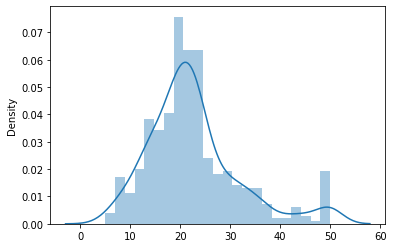

In [14]:
sns.distplot(y)

In [15]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [17]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [18]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(28.069414217019784, 10.758061513157887)

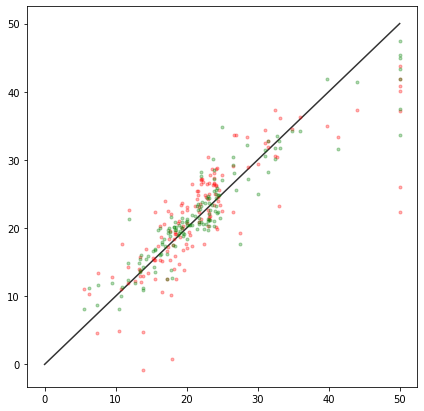

In [23]:
plt.figure(figsize = [7,7])
plt.plot([0,50], [0,50], color = '#333333')
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)

# customer analysis

In [36]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [37]:
df.columns = [a.lower().replace(' ', '_') for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [38]:
df = df[(~df.invoice.astype(str).str.contains('C')) & (df.country == 'United Kingdom') & (df.price >= 0)]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [39]:
df['date'] = df.invoicedate.to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['quantity'] * df['price']
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date,month,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,30.0


In [40]:
df = df[['customer_id', 'date', 'month', 'rev']].rename(columns = {'customer_id':'id'})
df = df.groupby(['id','date', 'month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2009-12-14,2009-12-01,90.0
1,12346.0,2009-12-18,2009-12-01,23.5
2,12346.0,2010-01-04,2010-01-01,45.0
3,12346.0,2010-01-14,2010-01-01,22.5
4,12346.0,2010-01-22,2010-01-01,22.5


In [45]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id','month'], ascending = [1, 0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12608.0,415.79
2,12745.0,0.00
3,12746.0,0.00
4,12747.0,1801.06


In [46]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id','month'], ascending = [1, 0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12608.0,1.0
2,12745.0,0.0
3,12746.0,0.0
4,12747.0,4.0


In [47]:
df['date'].max()

Timestamp('2010-12-09 00:00:00')

In [48]:
date_now = datetime(2010,12,31)

In [52]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now-x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,12346.0,186
1,12608.0,61
2,12745.0,143
3,12746.0,197
4,12747.0,26


In [54]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,12346.0,186,0.0,0.00
1,12608.0,61,1.0,415.79
2,12745.0,143,0.0,0.00
3,12746.0,197,0.0,0.00
4,12747.0,26,4.0,1801.06


In [57]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('54321')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('12345')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('12345'))
)
info.assign(rf = info.r.astype('str') + info.f.astype('str'))

,id,recency,freq,money,r,f,m,rf
0,12346.0,186,0.0,0.00,2,1,1,21
1,12608.0,61,1.0,415.79,3,2,4,32
2,12745.0,143,0.0,0.00,2,1,1,21
3,12746.0,197,0.0,0.00,2,1,1,21
4,12747.0,26,4.0,1801.06,5,5,5,55
...,...,...,...,...,...,...,...,...
3966,18283.0,39,1.0,195.35,4,4,3,44
3967,18284.0,88,1.0,461.68,3,4,4,34
3968,18285.0,317,0.0,0.00,1,2,2,12
3969,18286.0,133,0.0,0.00,2,2,2,22


# iterator

In [58]:
mat = [list('abc'), list('def'), list('hig')]
mat

[['a', 'b', 'c'], ['d', 'e', 'f'], ['h', 'i', 'g']]

In [59]:
for r, rows in enumerate(mat) :
  for c, letters in enumerate(rows) :
    print(f'({r}.{c}) - {letters}')

(0.0) - a
(0.1) - b
(0.2) - c
(1.0) - d
(1.1) - e
(1.2) - f
(2.0) - h
(2.1) - i
(2.2) - g


In [60]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'age': 73,
  'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M'},
 {'age': 29,
  'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F'},
 {'age': 51,
  'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M'},
 {'age': 32,
  'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F'},
 {'age': 42, 'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F'}]